In [2]:
import numpy as np
from matplotlib import pyplot as plt

from PIL import Image

In [3]:
to_gray = lambda img:np.sum(img.copy() * [.299,.587,.114], axis=-1)

In [4]:
img = np.array(Image.open('eri.jpeg'))#[:,:,:-1]
img_g = to_gray(np.array(img)).astype(int)

In [5]:
def apply_mask(image, kernel):
    new_img = np.zeros(image.shape)
    for i in range(img_g.shape[0]-kernel.shape[0]):
        for j in range(img_g.shape[1]-kernel.shape[1]):  
            new_img[i+kernel.shape[0],j+kernel.shape[1]] = np.sum(img_g[i:i+kernel.shape[0],j:j+kernel.shape[1]] * kernel)
    return new_img

def border_detection(image, kernel1, kernel2, th):
    img_k1 = abs(apply_mask(image, kernel1))
    img_k2 = abs(apply_mask(image, kernel2))

    img_k1[img_k1 < th] = 0
    img_k1[img_k1 > 0] = 1

    img_k2[img_k2 < th] = 0
    img_k2[img_k2 > 0] = 1

    fig, axs = plt.subplots(2,2)

    fig.set_size_inches(10, 6)
    axs[0,0].imshow(image,cmap="gray")
    axs[0,1].imshow(img_k1,cmap="gray",vmin=0, vmax=1)
    axs[1,0].imshow(img_k2,cmap="gray",vmin=0, vmax=1)
    axs[1,1].imshow(img_k1 + img_k2,cmap="gray",vmin=0, vmax=1)
    plt.show()

----------------------------------------Roberts----------------------------------------


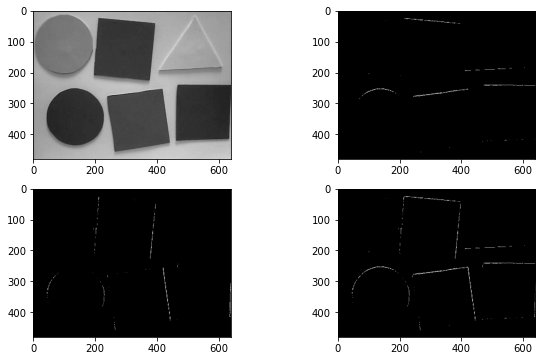

----------------------------------------Prewit----------------------------------------


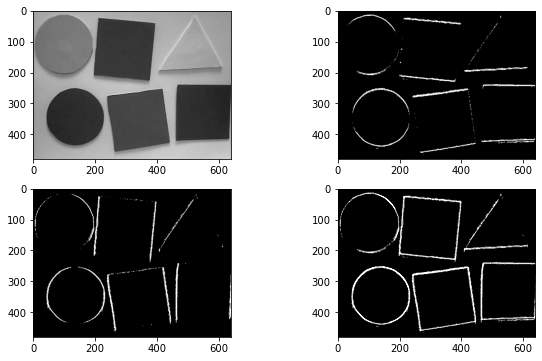

----------------------------------------Sobel----------------------------------------


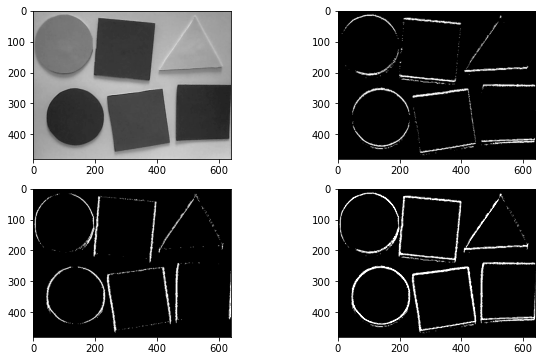

In [7]:

#_____________Roberts___________
print("-"*40+ "Roberts" + "-"*40)
th = 50
kernel1 = np.array([
        [1,0],
        [-1,0]
])
kernel2 = np.array([
        [1,-1],
        [0,0]
])
border_detection(img_g, kernel1, kernel2, th)


#______________Prewit______________

print("-"*40+ "Prewit" + "-"*40)
th = 50
kernel1 = np.array([
        [-1,-1,-1],
        [0,0,0],
        [1,1,1]
])
kernel2 = np.array([
        [-1,0,1],
        [-1,0,1],
        [-1,0,1]
])
border_detection(img_g, kernel1, kernel2, th)

#______________Sobel______________

print("-"*40+ "Sobel" + "-"*40)
th = 50
kernel1 = np.array([
        [-1,-2,-1],
        [0,0,0],
        [1,2,1]
])
kernel2 = np.array([
        [-1,0,1],
        [-2,0,2],
        [-1,0,1]
])
border_detection(img_g, kernel1, kernel2, th)